In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score
from sklearn.feature_selection import chi2,SelectKBest

In [48]:
import os
os.getcwd()
os.chdir(r"C:\Users\Administrator\Desktop\PYTHON\DS Case Study Eko")

In [67]:
dataset=pd.read_csv("cleaned.csv")
dataset.head(3)

,Unnamed: 0,mrn,Age,sex.factor,bmi,hypoxia_ed.factor,smoke_vape,dm.factor,htn.factor,pulm___1.factor,...,first_cxr_results___2.factor,first_cxr_results___3.factor,duration_symptoms,Ed_before_order_set,event,name,value,Date,Month,Year
0,0,655528,62.321679,Male,20.388645,No,No,No,Yes,Unchecked,...,Checked,Unchecked,8,No,Yes,s_bp_noninvasive (d),62.971715,2,7,2020
1,630,729545,78.625586,Female,27.554594,Yes,No,Yes,Yes,Unchecked,...,Checked,Unchecked,20,Yes,Yes,s_bp_noninvasive (d),58.688958,30,6,2020
2,1060,805568,70.460677,Female,34.141729,Yes,No,Yes,Yes,Unchecked,...,Checked,Unchecked,9,No,No,s_bp_noninvasive (d),64.848642,7,7,2020


In [68]:
dataset.columns

Index(['Unnamed: 0', 'mrn', 'Age', 'sex.factor', 'bmi', 'hypoxia_ed.factor',
       'smoke_vape', 'dm.factor', 'htn.factor', 'pulm___1.factor',
       'renal___1.factor', 'renal___2.factor', 'cad.factor', 'cancer',
       'any_immunosuppression', 'symptoms___1.factor', 'symptoms___2.factor',
       'symptoms___10.factor', 'symptoms___9.factor', 'symptoms___8.factor',
       'symptoms___3.factor', 'first_cxr_results___0.factor',
       'first_cxr_results___1.factor', 'first_cxr_results___2.factor',
       'first_cxr_results___3.factor', 'duration_symptoms',
       'Ed_before_order_set', 'event', 'name', 'value', 'Date', 'Month',
       'Year'],
      dtype='object')

In [69]:
x=dataset.drop(['Unnamed: 0','name','event'],axis=1)
y=dataset[['event']]

In [7]:
x.isnull().any()

mrn                             False
Age                             False
sex.factor                      False
bmi                             False
hypoxia_ed.factor               False
smoke_vape                      False
dm.factor                       False
htn.factor                      False
pulm___1.factor                 False
renal___1.factor                False
renal___2.factor                False
cad.factor                      False
cancer                          False
any_immunosuppression           False
symptoms___1.factor             False
symptoms___2.factor             False
symptoms___10.factor            False
symptoms___9.factor             False
symptoms___8.factor             False
symptoms___3.factor             False
first_cxr_results___0.factor    False
first_cxr_results___1.factor    False
first_cxr_results___2.factor    False
first_cxr_results___3.factor    False
duration_symptoms               False
Ed_before_order_set             False
value       

In [70]:
x=pd.get_dummies(x)

In [71]:
x.head()

,mrn,Age,bmi,duration_symptoms,value,Date,Month,Year,sex.factor_Female,sex.factor_Male,...,first_cxr_results___0.factor_Checked,first_cxr_results___0.factor_Unchecked,first_cxr_results___1.factor_Checked,first_cxr_results___1.factor_Unchecked,first_cxr_results___2.factor_Checked,first_cxr_results___2.factor_Unchecked,first_cxr_results___3.factor_Checked,first_cxr_results___3.factor_Unchecked,Ed_before_order_set_No,Ed_before_order_set_Yes
0,655528,62.321679,20.388645,8,62.971715,2,7,2020,0,1,...,0,1,0,1,1,0,0,1,1,0
1,729545,78.625586,27.554594,20,58.688958,30,6,2020,1,0,...,0,1,0,1,1,0,0,1,0,1
2,805568,70.460677,34.141729,9,64.848642,7,7,2020,1,0,...,0,1,0,1,1,0,0,1,1,0
3,895876,59.043149,19.833296,7,62.823134,30,6,2020,0,1,...,0,1,1,0,0,1,0,1,1,0
4,905164,90.477229,19.858003,25,60.045890,27,6,2020,0,1,...,0,1,0,1,1,0,0,1,0,1


In [54]:
x.Age.unique()

array([62.32167903, 78.62558567, 70.46067671, ..., 20.30180236,
       98.24985839, 64.08661029])

In [72]:
x[x.Age==x.Age.min()]

,mrn,Age,bmi,duration_symptoms,value,Date,Month,Year,sex.factor_Female,sex.factor_Male,...,first_cxr_results___0.factor_Checked,first_cxr_results___0.factor_Unchecked,first_cxr_results___1.factor_Checked,first_cxr_results___1.factor_Unchecked,first_cxr_results___2.factor_Checked,first_cxr_results___2.factor_Unchecked,first_cxr_results___3.factor_Checked,first_cxr_results___3.factor_Unchecked,Ed_before_order_set_No,Ed_before_order_set_Yes
54,1591734,5.408467,27.883886,9,61.942665,7,7,2020,0,1,...,0,1,1,0,0,1,0,1,1,0


In [26]:
#x.drop(index=845,axis=0,inplace=True)

In [30]:
x.shape

(1344, 52)

In [34]:
x.drop(index=1344,inplace=True)

In [56]:
best=SelectKBest(score_func=chi2,k=10)

In [57]:
fit=best.fit(x,y)

In [59]:
score=pd.DataFrame(fit.scores_)

In [60]:
feature=pd.DataFrame(x.columns)

In [63]:
data=pd.concat([feature,score],axis=1)
data.columns=['feature','score']
data.sort_values(by='score',ascending=False)

,feature,score
0,mrn,1.185625e+07
1,Age,8.852537e+02
2,bmi,1.498053e+02
3,duration_symptoms,6.552497e+01
5,Date,2.715241e+01
27,cancer_Yes,9.993819e+00
15,dm.factor_Yes,5.247080e+00
13,smoke_vape_Yes,4.705680e+00
51,Ed_before_order_set_Yes,2.989895e+00
14,dm.factor_No,2.368552e+00


In [65]:
data.nlargest(10,'score')

,feature,score
0,mrn,1.185625e+07
1,Age,8.852537e+02
2,bmi,1.498053e+02
3,duration_symptoms,6.552497e+01
5,Date,2.715241e+01
27,cancer_Yes,9.993819e+00
15,dm.factor_Yes,5.247080e+00
13,smoke_vape_Yes,4.705680e+00
51,Ed_before_order_set_Yes,2.989895e+00
14,dm.factor_No,2.368552e+00


In [38]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=10)
#pca.fit(x)
#x_pca = pca.transform(x)
#print(x.shape)
#print("-----")
#print(x_pca.shape)
#pca.components_

In [74]:
x=x[['mrn','Age','bmi','duration_symptoms','Date','cancer_Yes','dm.factor_Yes','smoke_vape_Yes',
     'Ed_before_order_set_Yes','dm.factor_No']]
x.head()

,mrn,Age,bmi,duration_symptoms,Date,cancer_Yes,dm.factor_Yes,smoke_vape_Yes,Ed_before_order_set_Yes,dm.factor_No
0,655528,62.321679,20.388645,8,2,0,0,0,0,1
1,729545,78.625586,27.554594,20,30,0,1,0,1,0
2,805568,70.460677,34.141729,9,7,0,1,0,0,0
3,895876,59.043149,19.833296,7,30,0,1,1,0,0
4,905164,90.477229,19.858003,25,27,0,1,0,1,0


In [79]:
y.head()

,event
0,1
1,1
2,0
3,0
4,0


In [78]:
y['event']=y['event'].replace(to_replace=['Yes','No'],value=[1,0],regex=True)

In [89]:
x.dtypes

mrn                          int64
Age                        float64
bmi                        float64
duration_symptoms            int64
Date                         int64
cancer_Yes                   uint8
dm.factor_Yes                uint8
smoke_vape_Yes               uint8
Ed_before_order_set_Yes      uint8
dm.factor_No                 uint8
dtype: object

In [91]:
x[['Date','cancer_Yes','dm.factor_Yes','smoke_vape_Yes','Ed_before_order_set_Yes','dm.factor_No']].astype(int)

,Date,cancer_Yes,dm.factor_Yes,smoke_vape_Yes,Ed_before_order_set_Yes,dm.factor_No
0,2,0,0,0,0,1
1,30,0,1,0,1,0
2,7,0,1,0,0,0
3,30,0,1,1,0,0
4,27,0,1,0,1,0
...,...,...,...,...,...,...
1339,4,0,1,0,0,0
1340,27,0,1,1,1,0
1341,2,0,0,1,0,1
1342,28,0,0,0,1,1


In [99]:
x['Age']=x['Age'].astype(int)

In [100]:
x.dtypes

mrn                          int64
Age                          int32
bmi                        float64
duration_symptoms            int64
Date                         int64
cancer_Yes                   uint8
dm.factor_Yes                uint8
smoke_vape_Yes               uint8
Ed_before_order_set_Yes      uint8
dm.factor_No                 uint8
dtype: object

In [101]:
x['Age'].unique()

array([ 62,  78,  70,  59,  90,  72,  47,  76,  55,  99,  31,  85,  56,
        51,  66,  41,  57,  42,  16,  83,  82,  74,  23,  77,  61,  68,
        17,  50,  48,  49,  64,  91,  79,  65,  71,  34,  40,  73,  29,
         5,  58,  52,  88,  60,  81,  86,  53,  69,  80,  98,  84,  37,
        44,  75,  67, 103,  92,  36,  54,  33,  95,  43,  87,  63,  30,
        46, 107,  38,  20,  97,  27,  89,  35,  96,  93,  28,  32,  39,
       101,  94,  18,  24,  26,  25,  45,  22, 100, 102, 108, 113],
      dtype=int64)

In [102]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [103]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [104]:
y_pred=lr_model.predict(xtest)

In [105]:
print("score of LogisticRegression is {:.2f}%".format(accuracy_score(ytest,y_pred)*100))

score of LogisticRegression is 51.19%


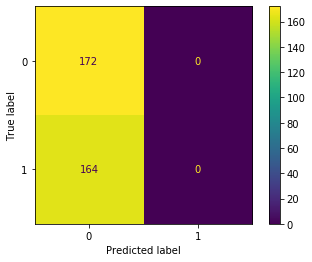

In [107]:
plot_confusion_matrix(lr_model,xtest,ytest)

In [108]:
from sklearn.tree import DecisionTreeClassifier
dte=DecisionTreeClassifier()
dte.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [109]:
y_pred2=dte.predict(xtest)

In [110]:
print("accuracy is {:.2f}%".format(accuracy_score(ytest,y_pred2)*100))

accuracy is 60.42%


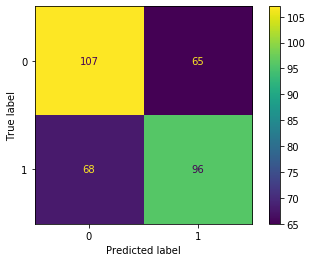

In [111]:
plot_confusion_matrix(dte,xtest,ytest)

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfe=RandomForestClassifier(n_estimators=10)
rfe.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [113]:
y_pred3=rfe.predict(xtest)

In [114]:
print("accuracy is {:.2f}%".format(accuracy_score(ytest,y_pred3)*100))

accuracy is 68.45%


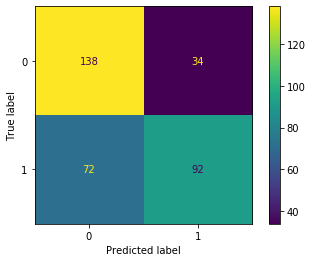

In [119]:
plot_confusion_matrix(rfe,xtest,ytest)

In [115]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain, ytrain)

[13:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
y_pred5=xgb.predict(xtest)

In [118]:
print("Model accuracy ={:.2f}%".format(accuracy_score(ytest,y_pred5)*100))

Model accuracy =67.86%


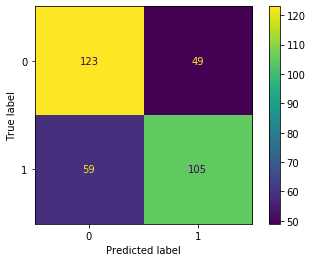

In [120]:
plot_confusion_matrix(xgb,xtest,ytest)

In [122]:
import pickle
pickle.dump(rfe,open('model.pkl','wb'))